In [1]:
!pip install fastcore >/dev/null 2>&1
!pip install wandb >/dev/null 2>&1
!pip install ghapi >/dev/null 2>&1

In [2]:
import wandb
wandb.login()

wandb: Currently logged in as: eolecvka. Use `wandb login --relogin` to force relogin


True

In [6]:
import wandb,os
from fastcore.all import *
import pandas as pd

api = wandb.Api()

sweep_ids = [
    'eolecvka/fastai-img-models/sweeps/20gckfsi'
]
sweeps = concat(api.sweep(o).runs for o in sweep_ids)
summs = [{**r.summary, 'model_name':r.config['model_name']} for r in sweeps]

df = pd.DataFrame(summs)
df['error_rate'] = 1-df.accuracy

pd.set_option('display.max_columns', None)

In [10]:
df['_timestamp'].tolist()

[nan,
 1657844540.0,
 1657844543.0,
 1657844449.0,
 1657844331.0,
 1657844382.0,
 1657844148.0,
 1657844082.0,
 1657844237.0,
 1657843939.0,
 1657843938.0,
 1657843858.0,
 1657843837.0,
 1657843727.0,
 1657843756.0,
 1657843562.0,
 1657843495.0,
 1657843362.0,
 1657843456.0,
 1657843253.0,
 1657843199.0]

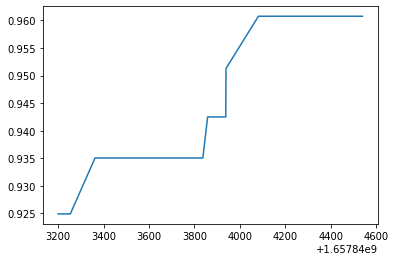

In [16]:
from matplotlib import pyplot as plt
df_sorted = df.sort_values('_timestamp').dropna()
df_sorted['best_acc'] = df_sorted['accuracy'].cummax()
plt.plot(df_sorted['_timestamp'], df_sorted['best_acc'])